# Step 1: Installation and Setup

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os, sys
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.model_selection import train_test_split

# Step 2: Data Preprocessing

In [3]:
# Importing the dataset 
from PIL import Image
import os, sys
path = "."

dirs_train_o = os.listdir(path + "/TRAIN/O")
dirs_train_r = os.listdir(path + "/TRAIN/R")
dirs_test_o = os.listdir(path + "/TEST/O")
dirs_test_r = os.listdir(path + "/TEST/R")

# Resize image using Pillow
class_name = ['O', 'R']
# Create training set
x_train = []
x_train.append(dirs_train_o)
x_train.append(dirs_train_r)

# Create testing test
x_test = []
x_test.append(dirs_test_o)
x_test.append(dirs_test_r)

def modify_image(dataset, pathname):
  names = []
  labels = []
  for type in range(2):
    for item in dataset[type]:
      path_tmp = path + "/" + pathname + "/" + class_name[type] + "/"
      if os.path.isfile(path_tmp+item):
        im = Image.open(path_tmp+item)
        imResize = im.resize((32, 32), Image.ANTIALIAS)
        if imResize.mode != 'RGB':
          imResize = imResize.convert('RGB')
        names.append(imResize)
        labels.append(type)
  return names, labels

names_train, labels_train = modify_image(x_train, "TRAIN")
names_test, labels_test = modify_image(x_test, "TEST")
print("Done")

Done


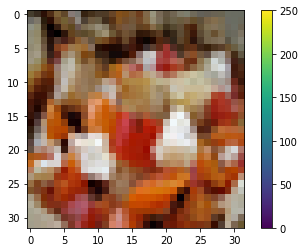

In [4]:
# Train
x_train = np.array([np.array(fname) for fname in names_train])
y_train = np.array(labels_train)

# Test
x_test = np.array([np.array(fname) for fname in names_test])
y_test = np.array(labels_test)

# Data Exploration
x_train.shape, y_train.shape
plt.figure()
plt.imshow(x_train[12])
plt.colorbar()

# Normalizing the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
names = ["Organic", "Recyclable"]

## Building the CNN - 1 Layer

In [6]:
# Defining the object
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[32,32,3]))
model1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(units=256, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(units=128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model1.summary()

# Compiling the model
model1.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3

In [7]:
history1 = model1.fit(x_train, y_train, batch_size=10, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
1806/1806 [==============================] - 15s 9ms/step - loss: 0.4909 - accuracy: 0.7841 - val_loss: 0.4347 - val_accuracy: 0.8110
Epoch 2/20
1806/1806 [==============================] - 15s 8ms/step - loss: 0.4489 - accuracy: 0.8068 - val_loss: 0.4217 - val_accuracy: 0.8110
Epoch 3/20
1806/1806 [==============================] - 15s 9ms/step - loss: 0.4354 - accuracy: 0.8144 - val_loss: 0.4306 - val_accuracy: 0.8061
Epoch 4/20
1806/1806 [==============================] - 16s 9ms/step - loss: 0.4232 - accuracy: 0.8196 - val_loss: 0.4246 - val_accuracy: 0.8196
Epoch 5/20
1806/1806 [==============================] - 16s 9ms/step - loss: 0.4152 - accuracy: 0.8229 - val_loss: 0.4299 - val_accuracy: 0.8134
Epoch 6/20
1806/1806 [==============================] - 15s 8ms/step - loss: 0.4052 - accuracy: 0.8262 - val_loss: 0.4025 - val_accuracy: 0.8250
Epoch 7/20
1806/1806 [==============================] - 14s 8ms/step - loss: 0.3938 - accuracy: 0.8340 - val_loss: 0.5007 - val_ac

79/79 [==============================] - 0s 4ms/step - loss: 0.3419 - accuracy: 0.8842
Test Accuracy is: 0.8842021226882935
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


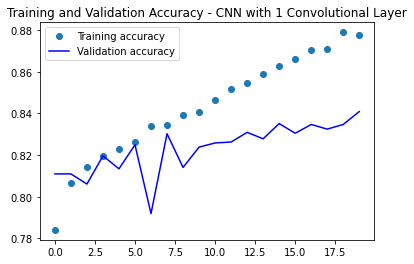

In [8]:
# Evaluate model performance
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Accuracy is: {}".format(test_acc))
# Predictions
y_pred = model1.predict_classes(x_test)

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'o', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title("Training and Validation Accuracy - CNN with 1 Convolutional Layer")
plt.legend()
plt.savefig("acc-CNN1")

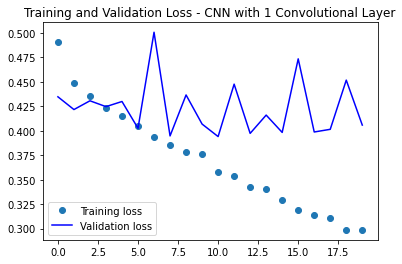

In [9]:
plt.plot(epochs, loss, 'o', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation Loss - CNN with 1 Convolutional Layer")
plt.legend()
# plt.figure()
plt.savefig("loss-CNN1")

In [10]:
print("Classification report on 2513 samples - CNN with 1 Convolutional Layer:")
print()
print(classification_report(y_test, y_pred, target_names=names))

Classification report on 2513 samples - CNN with 1 Convolutional Layer:

              precision    recall  f1-score   support

     Organic       0.85      0.97      0.90      1401
  Recyclable       0.95      0.78      0.86      1112

    accuracy                           0.88      2513
   macro avg       0.90      0.87      0.88      2513
weighted avg       0.89      0.88      0.88      2513



## Building the CNN - 2 Layers

In [11]:
# Defining the object
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[32,32,3]))
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(units=256, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(units=128, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model2.summary()
# Compiling the model
model2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, batch_size=10, epochs=20, validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

79/79 [==============================] - 1s 7ms/step - loss: 0.2898 - accuracy: 0.8957
Test Accuracy is: 0.8957421183586121


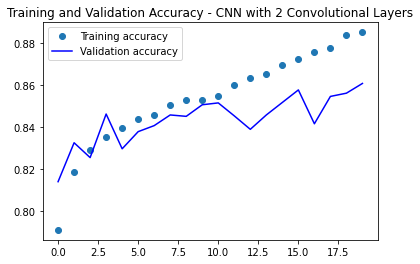

In [12]:
# Evaluate model performance
test_loss, test_acc = model2.evaluate(x_test, y_test)
print("Test Accuracy is: {}".format(test_acc))
# Predictions
y_pred = model2.predict_classes(x_test)

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'o', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title("Training and Validation Accuracy - CNN with 2 Convolutional Layers")
plt.legend()
plt.savefig("acc-CNN2")

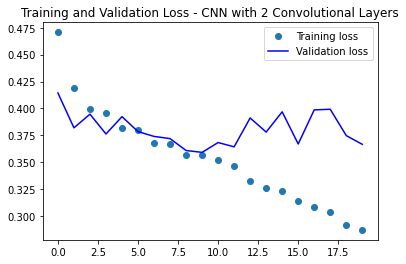

In [13]:
plt.plot(epochs, loss, 'o', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation Loss - CNN with 2 Convolutional Layers")
plt.legend()
# plt.figure()
plt.savefig("loss-CNN2")

In [14]:
print("Classification report on 2513 samples - CNN with 2 Convolutional Layers:")
print()
print(classification_report(y_test, y_pred, target_names=names))

Classification report on 2513 samples - CNN with 2 Convolutional Layers:

              precision    recall  f1-score   support

     Organic       0.87      0.95      0.91      1401
  Recyclable       0.93      0.83      0.88      1112

    accuracy                           0.90      2513
   macro avg       0.90      0.89      0.89      2513
weighted avg       0.90      0.90      0.89      2513



## Building the CNN - 3 Layers

In [15]:
# Defining the object
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[32,32,3]))
model3.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model3.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(units=256, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(units=128, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model3.summary()
# Compiling the model
model3.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

In [16]:
history3 = model3.fit(x_train, y_train, batch_size=10, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
1806/1806 [==============================] - 38s 21ms/step - loss: 0.4594 - accuracy: 0.7978 - val_loss: 0.4689 - val_accuracy: 0.7879
Epoch 2/20
1806/1806 [==============================] - 40s 22ms/step - loss: 0.4086 - accuracy: 0.8222 - val_loss: 0.3770 - val_accuracy: 0.8367
Epoch 3/20
1806/1806 [==============================] - 39s 22ms/step - loss: 0.3886 - accuracy: 0.8346 - val_loss: 0.3842 - val_accuracy: 0.8227
Epoch 4/20
1806/1806 [==============================] - 40s 22ms/step - loss: 0.3830 - accuracy: 0.8412 - val_loss: 0.3690 - val_accuracy: 0.8396
Epoch 5/20
1806/1806 [==============================] - 40s 22ms/step - loss: 0.3679 - accuracy: 0.8463 - val_loss: 0.3555 - val_accuracy: 0.8464
Epoch 6/20
1806/1806 [==============================] - 40s 22ms/step - loss: 0.3597 - accuracy: 0.8514 - val_loss: 0.3527 - val_accuracy: 0.8480
Epoch 7/20
1806/1806 [==============================] - 40s 22ms/step - loss: 0.3563 - accuracy: 0.8521 - val_loss: 0.3722 -

79/79 [==============================] - 1s 9ms/step - loss: 0.3128 - accuracy: 0.8874
Test Accuracy is: 0.8873856067657471


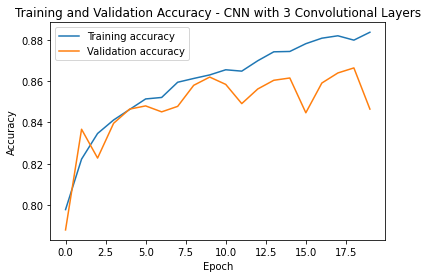

In [17]:
# Evaluate model performance
test_loss, test_acc = model3.evaluate(x_test, y_test)
print("Test Accuracy is: {}".format(test_acc))
# Predictions
y_pred = model3.predict_classes(x_test)

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, label="Training accuracy")
plt.plot(epochs, val_acc, label="Validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("Training and Validation Accuracy - CNN with 3 Convolutional Layers")
plt.legend()
plt.savefig("acc-CNN3")

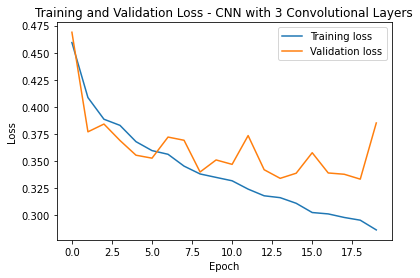

In [18]:
plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Training and Validation Loss - CNN with 3 Convolutional Layers")
plt.legend()
# plt.figure()
plt.savefig("loss-CNN3")

In [19]:
print("Classification report on 2513 samples - CNN with 3 Convolutional Layers:")
print()
print(classification_report(y_test, y_pred, target_names=names))

Classification report on 2513 samples - CNN with 3 Convolutional Layers:

              precision    recall  f1-score   support

     Organic       0.92      0.88      0.90      1401
  Recyclable       0.85      0.90      0.88      1112

    accuracy                           0.89      2513
   macro avg       0.89      0.89      0.89      2513
weighted avg       0.89      0.89      0.89      2513

